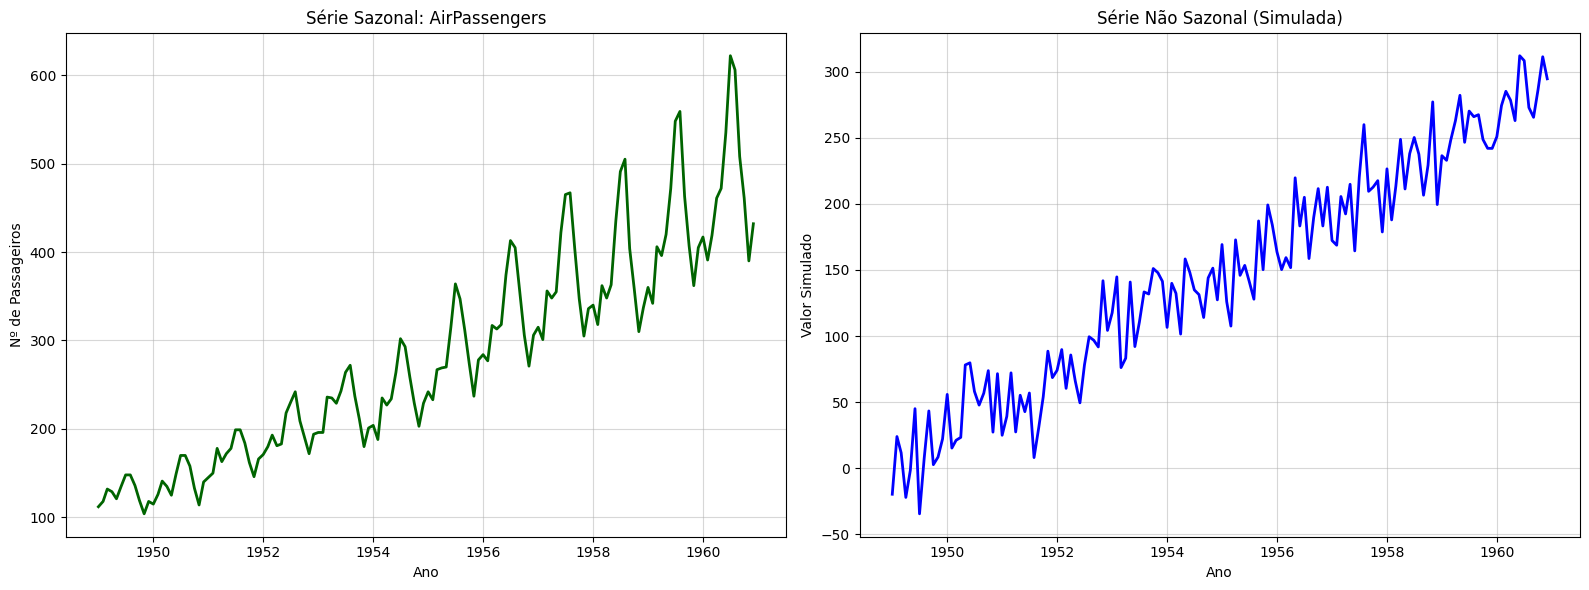

Exibindo o gráfico de decomposição...


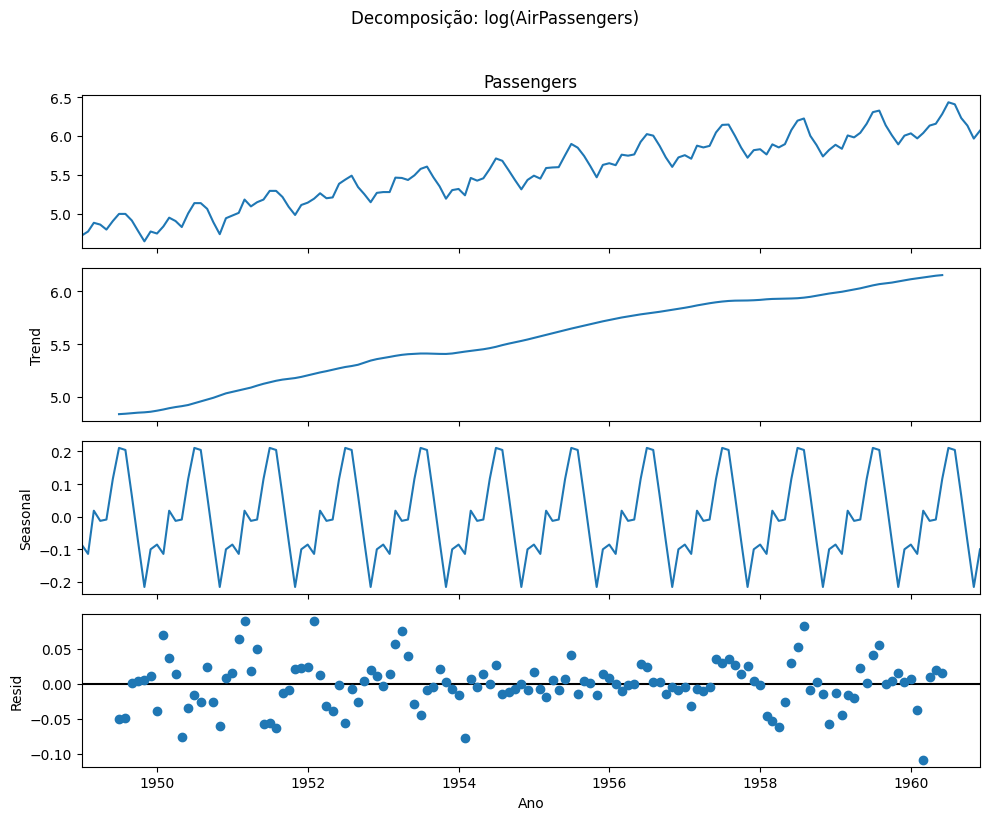

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Carregar a base AirPassengers (da web) ---
url_air = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
air_passengers_df = pd.read_csv(url_air, parse_dates=['Month'], index_col='Month')
air_passengers = air_passengers_df['Passengers']

# --- Criação de uma série Não Sazonal (Simulada) ---
np.random.seed(123)
n_pontos = len(air_passengers)
tempo = np.arange(1, n_pontos + 1)
# Cria um ruído aleatório
ruido = np.random.normal(loc=0, scale=20, size=n_pontos)
# Cria uma série com tendência linear (2*t) mais o ruído
serie_nao_sazonal_array = 2 * tempo + ruido
# Transforma em uma Série pandas com o mesmo índice de datas da AirPassengers
ts_nao_sazonal = pd.Series(serie_nao_sazonal_array, index=air_passengers.index)

# --- Gráficos lado a lado: Sazonal x Não Sazonal ---
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# --- Gráfico 1: Série Sazonal (ax1) ---
ax1.plot(air_passengers.index, air_passengers, color="darkgreen", linewidth=2)
ax1.set_title("Série Sazonal: AirPassengers")
ax1.set_xlabel("Ano")
ax1.set_ylabel("Nº de Passageiros")
ax1.grid(True, alpha=0.5)

# --- Gráfico 2: Série Não Sazonal (ax2) ---
ax2.plot(ts_nao_sazonal.index, ts_nao_sazonal, color="blue", linewidth=2)
ax2.set_title("Série Não Sazonal (Simulada)")
ax2.set_xlabel("Ano")
ax2.set_ylabel("Valor Simulado")
ax2.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


# --- Decomposição da série AirPassengers (aditiva) ---
# Como AirPassengers tem crescimento exponencial, aplicamos log
# para transformar o modelo multiplicativo em aditivo
log_air = np.log(air_passengers)

# Realiza a decomposição
decomp = seasonal_decompose(log_air, model='additive', period=12)

print("Exibindo o gráfico de decomposição...")
fig = decomp.plot()
fig.set_size_inches(10, 8)
fig.suptitle("Decomposição: log(AirPassengers)", y=1.02)

# Remove o rótulo do eixo X de todos os subplots para limpar o gráfico
for ax in fig.axes:
    ax.set_xlabel('')
    
# Adiciona o rótulo "Ano" apenas no último subplot (Resíduo)
fig.axes[-1].set_xlabel("Ano")

plt.tight_layout()
plt.show()

# --- Descrição dos Painéis (conforme solicitado) ---
# Painel 1 (Observado): Série original, já com crescimento e variação sazonal.
# Painel 2 (Tendência): Mostra o crescimento do número de passageiros ao longo do tempo.
# Painel 3 (Sazonalidade): Repetição cíclica mensal, destacando a alta temporada.
# Painel 4 (Resíduo): Variações que não são explicadas pela tendência nem pela sazonalidade.